In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

# Create image folder if it doesn't exist
if not os.path.exists("images"):
    os.makedirs("images")



In [2]:

df = pd.read_csv('paysim.csv')

print("Shape of dataset:", df.shape)
print("Fraud value counts:\n", df['isFraud'].value_counts())


Shape of dataset: (6362620, 11)
Fraud value counts:
 isFraud
0    6354407
1       8213
Name: count, dtype: int64


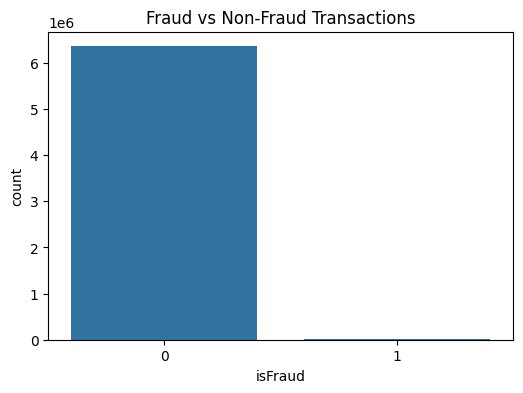

In [3]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='isFraud')
plt.title("Fraud vs Non-Fraud Transactions")
plt.savefig("images/class_distribution.png")
plt.show()


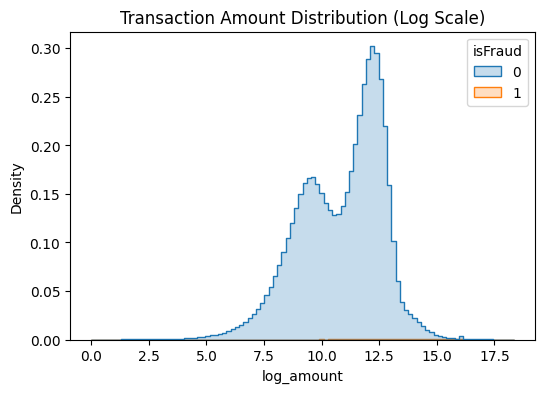

In [4]:
df['log_amount'] = np.log1p(df['amount'])  # log(1 + amount)
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='log_amount', hue='isFraud', bins=100, element='step', stat='density')
plt.title("Transaction Amount Distribution (Log Scale)")
plt.savefig("images/log_amount_distribution.png")
plt.show()



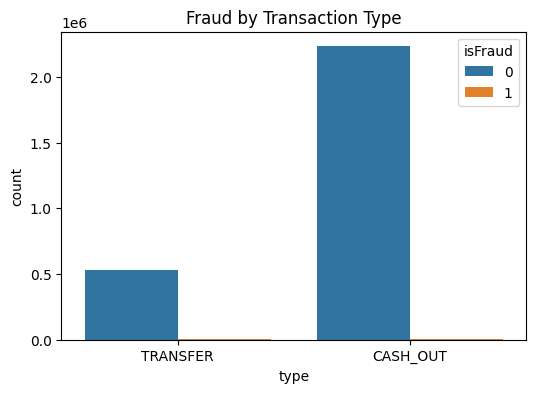

In [5]:
types_with_fraud = df[df['isFraud'] == 1]['type'].unique()
filtered = df[df['type'].isin(types_with_fraud)]

plt.figure(figsize=(6,4))
sns.countplot(data=filtered, x='type', hue='isFraud')
plt.title("Fraud by Transaction Type")
plt.savefig("images/fraud_by_type.png")
plt.show()


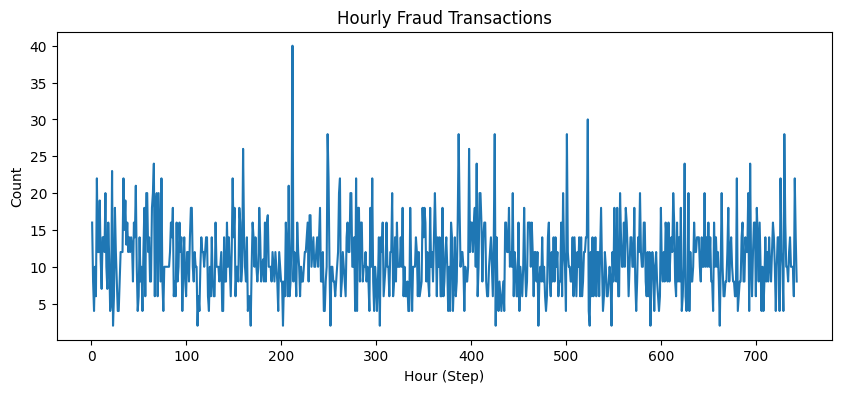

In [6]:
fraud_hourly = df[df['isFraud'] == 1]['step'].value_counts().sort_index()
plt.figure(figsize=(10,4))
fraud_hourly.plot(kind='line')
plt.title("Hourly Fraud Transactions")
plt.xlabel("Hour (Step)")
plt.ylabel("Count")
plt.savefig("images/fraud_by_hour.png")
plt.show()
